In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 500)

In [2]:
import bambi as bmb

In [3]:
import numpyro

In [4]:
import pymc as pm
import arviz as az

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
data_frame = pd.read_table("tbl.txt", delimiter="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/xq/sl7xjp_95qx7wfngy6s6vvg00000gn/T/ipykernel_83231/3304233864.py:1: SyntaxWarning: invalid escape sequence '\s'
  data_frame = pd.read_table("tbl.txt", delimiter="\s+")


In [7]:
data_frame

subject    ROI       y      x
0     HMN001   RPCC  0.3457  17.76
1     HMN002   RPCC  0.5166  17.05
2     HMN003   RPCC  0.0919  15.81
3     HMN004   RPCC  0.3635  15.19
4     HMN005   RPCC  0.7323  17.31
...      ...    ...     ...    ...
2599  HMN194  vmPFC  0.1730  18.93
2600  HMN196  vmPFC  0.2926  19.31
2601  HMN197  vmPFC  0.1925  18.00
2602  HMN199  vmPFC  0.3157  15.26
2603  HMN201  vmPFC  0.5199  17.21

[2604 rows x 4 columns]

In [8]:
model = bmb.Model("y ~ x + (1|subject) + (x|ROI)", data_frame)

In [15]:
results = model.fit(
    tune=4000, 
    draws=10000, 
    chains=8, 
    inference_method="nutpie", 
    nuts_kwargs=dict(max_tree_depth=100),
)

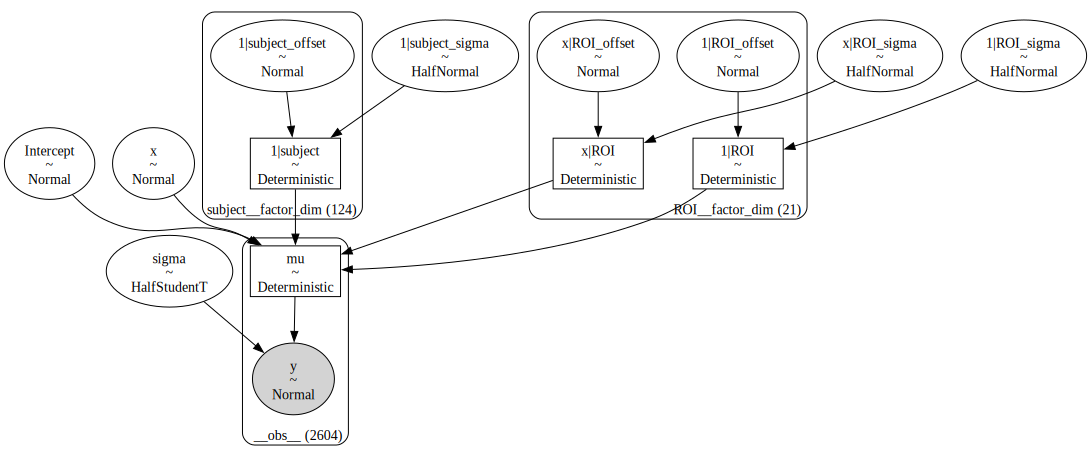

In [12]:
model.graph()

In [16]:
results

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Warmup iterations saved (warmup_*).

In [17]:
number_of_divergences = int(results.sample_stats.diverging.sum())
number_of_divergences

3

In [18]:
bool(np.all((0.9 <= az.rhat(results) <= 1.05).to_array()))

True

In [19]:
az.summary(results)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
1|ROI_sigma           0.073  0.034   0.001    0.127      0.001    0.001   
1|subject_sigma       0.077  0.006   0.066    0.088      0.000    0.000   
Intercept             0.052  0.065  -0.071    0.175      0.001    0.001   
sigma                 0.153  0.002   0.149    0.157      0.000    0.000   
x                     0.007  0.004  -0.001    0.015      0.000    0.000   
x|ROI_sigma           0.009  0.002   0.006    0.012      0.000    0.000   
1|ROI[ACC]           -0.027  0.059  -0.142    0.081      0.001    0.001   
1|ROI[LAmy/Hippo]     0.017  0.057  -0.093    0.127      0.001    0.001   
1|ROI[LCing]         -0.038  0.061  -0.164    0.069      0.001    0.001   
1|ROI[LIFG]          -0.016  0.056  -0.128    0.088      0.001    0.001   
1|ROI[LIPL]          -0.027  0.057  -0.139    0.082      0.001    0.001   
1|ROI[LMTG]           0.035  0.058  -0.064    0.152      0.001    0.001   
1|ROI[LSFG]          -0.029  0.056  -0.140    0.070      0.001    0.001   
1|ROI[LTPJ]           0.022  0.059  -0.086    0.137      0.001    0.001   
1|ROI[LaMTS/aMTG]    -0.040  0.060  -0.167    0.059      0.001    0.001   
1|ROI[LvBG]          -0.013  0.056  -0.128    0.090      0.001    0.001   
1|ROI[PCC]           -0.025  0.058  -0.147    0.078      0.001    0.001   
1|ROI[RAmy/Hippo]     0.020  0.057  -0.085    0.138      0.001    0.001   
1|ROI[RIFG_BA45]      0.018  0.058  -0.093    0.133      0.001    0.001   
1|ROI[RIFG_BA9]       0.008  0.056  -0.096    0.123      0.001    0.001   
1|ROI[RIns]           0.025  0.057  -0.078    0.141      0.001    0.001   
1|ROI[RPCC]           0.003  0.057  -0.105    0.114      0.001    0.001   
1|ROI[RTPJp]          0.161  0.104  -0.009    0.340      0.003    0.002   
1|ROI[RvBG]           0.000  0.057  -0.109    0.110      0.001    0.001   
1|ROI[SGC]           -0.032  0.059  -0.150    0.072      0.001    0.001   
1|ROI[dmMPFC]        -0.025  0.057  -0.146    0.073      0.001    0.001   
1|ROI[vmPFC]         -0.038  0.058  -0.156    0.061      0.001    0.001   
1|subject[HMN001]     0.057  0.031  -0.002    0.115      0.000    0.000   
1|subject[HMN002]     0.052  0.031  -0.007    0.110      0.000    0.000   
1|subject[HMN003]     0.000  0.031  -0.055    0.061      0.000    0.000   
1|subject[HMN004]    -0.088  0.031  -0.146   -0.029      0.000    0.000   
1|subject[HMN005]     0.032  0.031  -0.023    0.094      0.000    0.000   
1|subject[HMN006]     0.030  0.032  -0.033    0.089      0.000    0.000   
1|subject[HMN007]    -0.011  0.032  -0.070    0.049      0.000    0.000   
1|subject[HMN008]    -0.130  0.032  -0.189   -0.070      0.000    0.000   
1|subject[HMN011]     0.002  0.032  -0.055    0.064      0.000    0.000   
1|subject[HMN012]    -0.010  0.031  -0.068    0.050      0.000    0.000   
1|subject[HMN013]     0.030  0.032  -0.029    0.092      0.000    0.000   
1|subject[HMN014]     0.084  0.031   0.027    0.142      0.000    0.000   
1|subject[HMN018]     0.019  0.031  -0.038    0.078      0.000    0.000   
1|subject[HMN019]    -0.014  0.032  -0.070    0.051      0.000    0.000   
1|subject[HMN020]     0.085  0.031   0.027    0.144      0.000    0.000   
1|subject[HMN021]    -0.106  0.032  -0.167   -0.048      0.000    0.000   
1|subject[HMN023]     0.033  0.033  -0.027    0.095      0.000    0.000   
1|subject[HMN024]    -0.036  0.032  -0.096    0.021      0.000    0.000   
1|subject[HMN025]    -0.028  0.032  -0.086    0.032      0.000    0.000   
1|subject[HMN026]    -0.028  0.031  -0.088    0.029      0.000    0.000   
1|subject[HMN027]    -0.095  0.032  -0.152   -0.035      0.000    0.000   
1|subject[HMN028]     0.008  0.031  -0.051    0.065      0.000    0.000   
1|subject[HMN029]     0.007  0.032  -0.055    0.067      0.000    0.000   
1|subject[HMN030]     0.041  0.031  -0.019    0.097      0.000    0.000   
1|subject[HMN031]     0.089  0.032   0.026    0.146      0.000    0.000   
1|subject[HMN032]     0.038  0.032  -0.022    0.

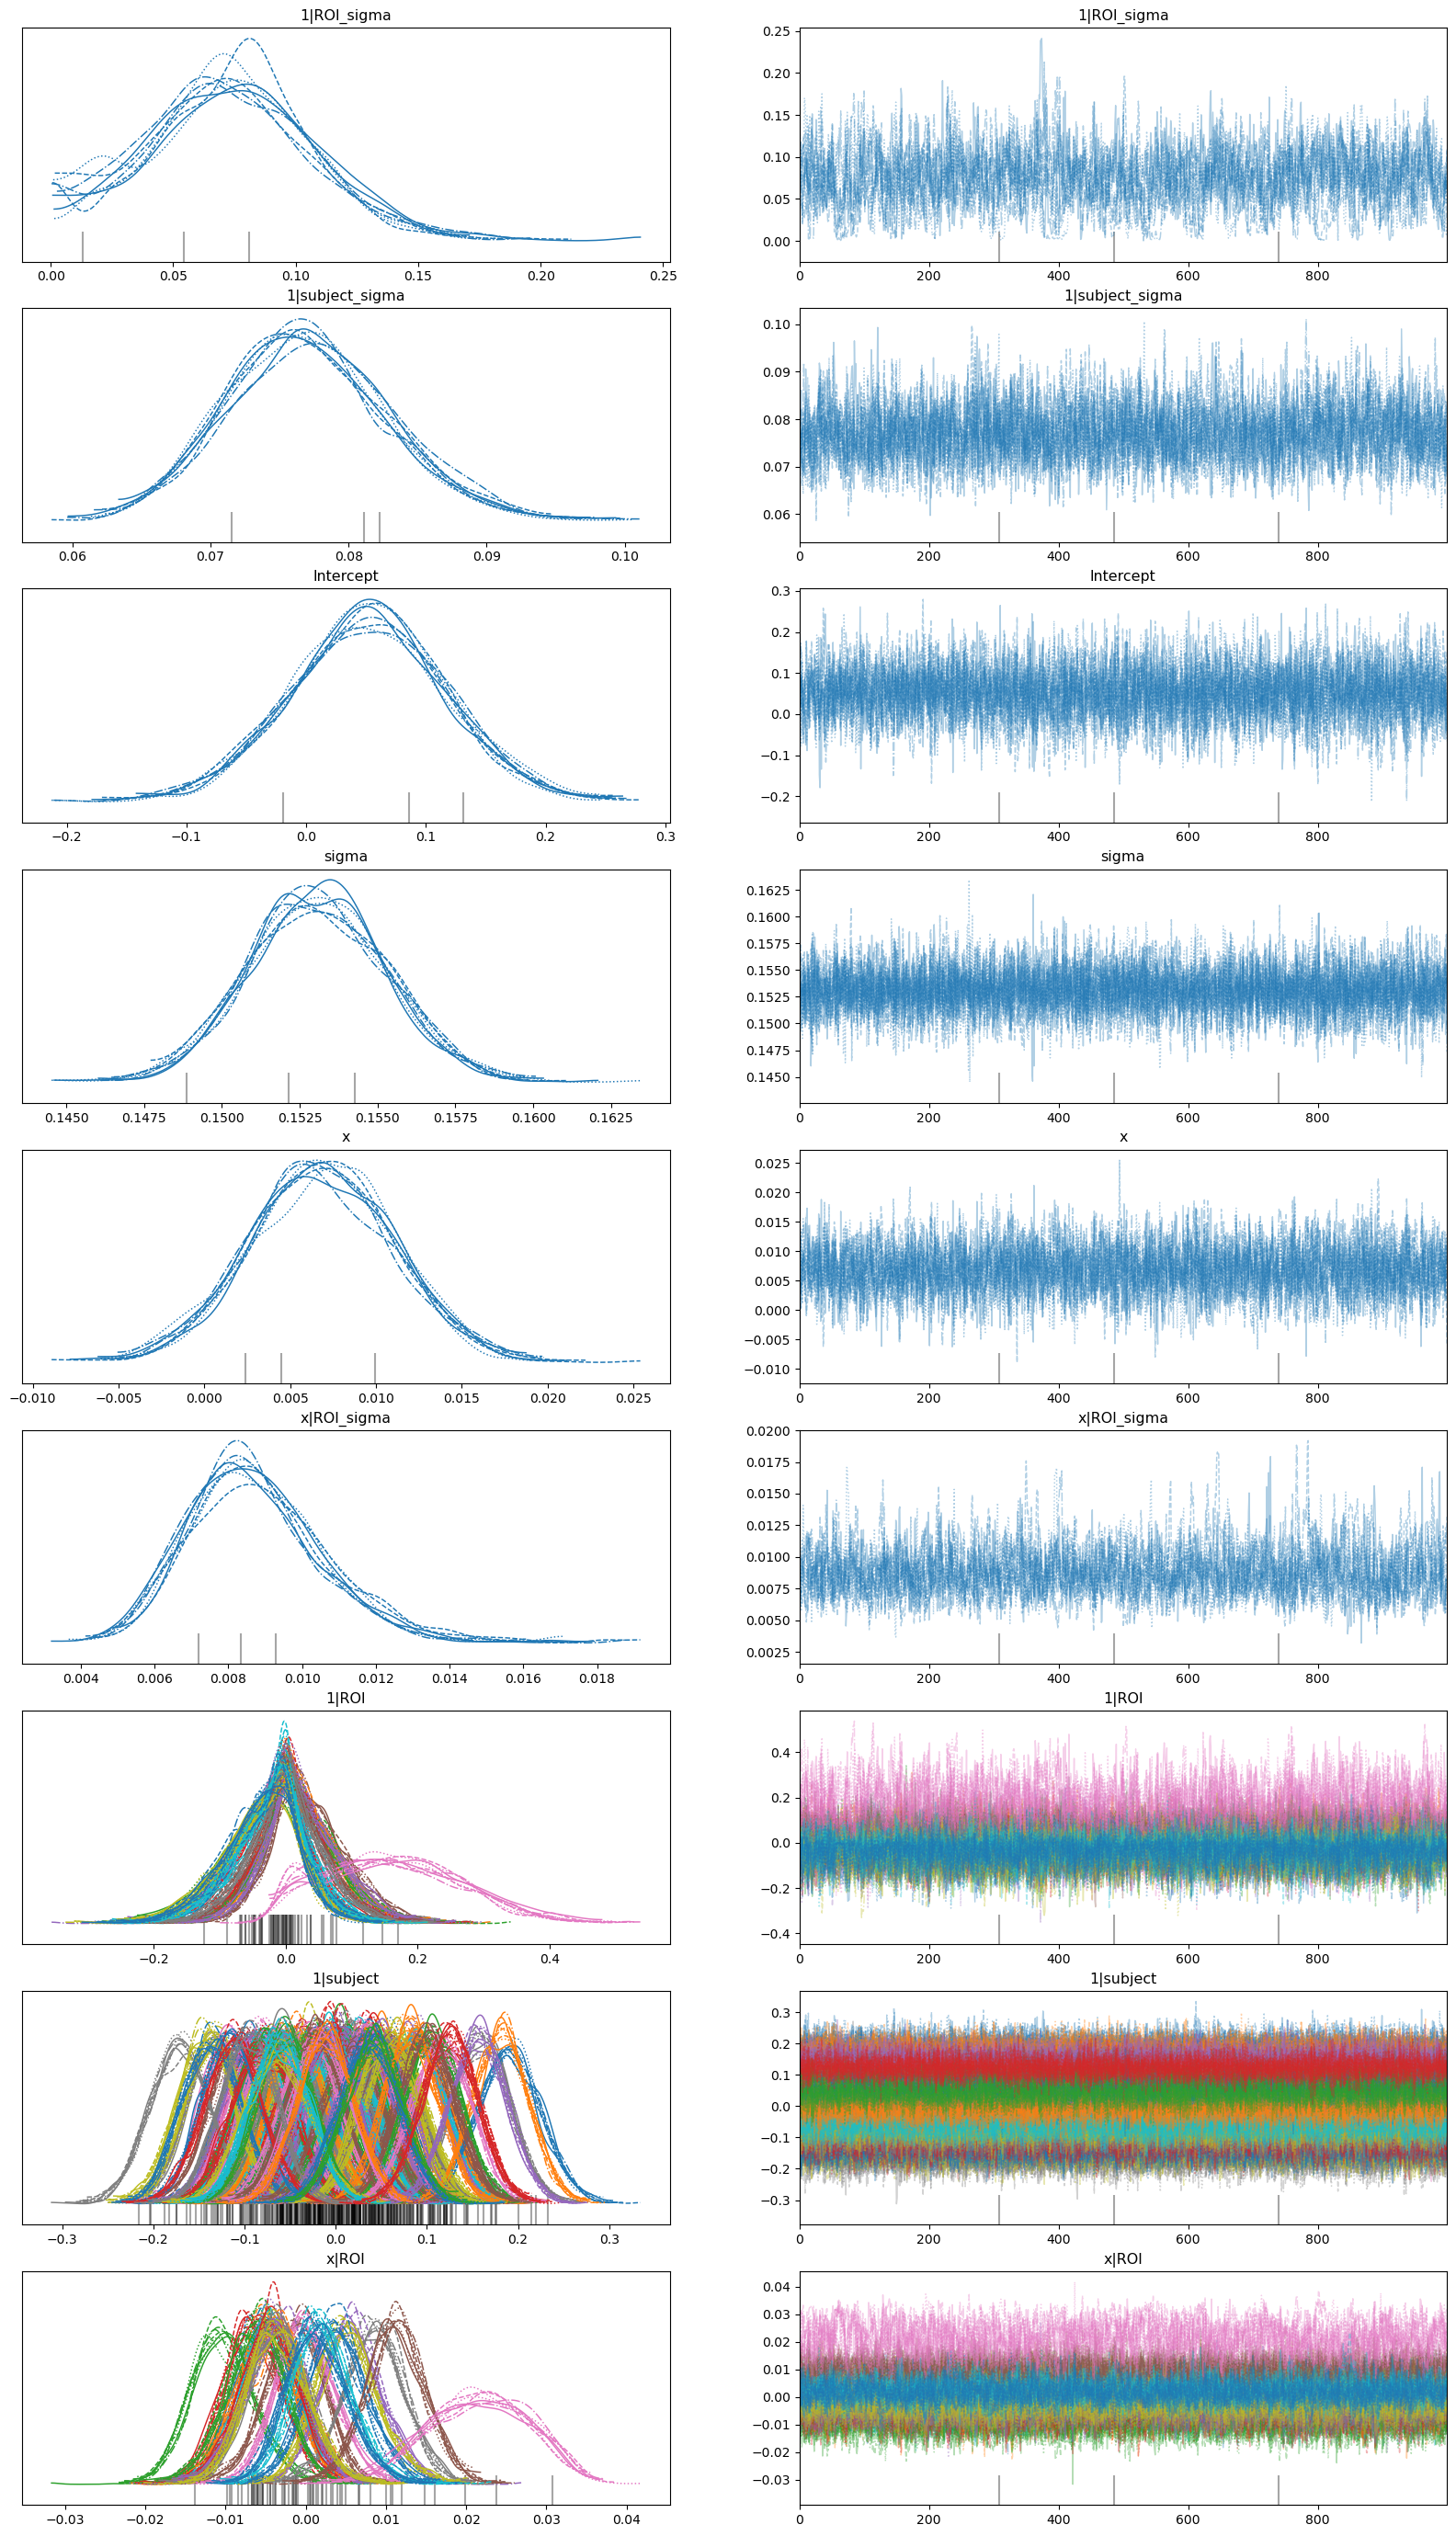

In [20]:
_ = az.plot_trace(results, figsize=(20, 35))

In [22]:
sample_frame = results["posterior"]["x|ROI"].stack(y=["draw", "chain"]).to_pandas().transpose()

In [23]:
sample_frame.reset_index(inplace=True)

In [24]:
sample_frame

ROI__factor_dim  draw  chain       ACC  LAmy/Hippo     LCing      LIFG  \
0                   0      0 -0.003409   -0.006182 -0.014417 -0.012621   
1                   0      1 -0.001781   -0.003188 -0.008611 -0.007422   
2                   0      2  0.004964   -0.003527 -0.001626 -0.006125   
3                   0      3 -0.005693   -0.003761 -0.010357 -0.000386   
4                   0      4 -0.008843   -0.003751 -0.011647 -0.000046   
...               ...    ...       ...         ...       ...       ...   
7995              999      3 -0.009394   -0.003412 -0.006517 -0.000053   
7996              999      4 -0.009499   -0.006553 -0.013227 -0.009685   
7997              999      5 -0.007325   -0.004422 -0.013858 -0.005989   
7998              999      6 -0.007320   -0.001238 -0.010515 -0.007825   
7999              999      7 -0.004626    0.000645 -0.007535 -0.004716   

ROI__factor_dim      LIPL      LMTG      LSFG      LTPJ  ...  RAmy/Hippo  \
0                0.013360 -0.009250  0.005072  0.004763  ...   -0.015991   
1                0.003580 -0.000170 -0.001439  0.004809  ...   -0.002676   
2                0.004755  0.003098 -0.000746 -0.002092  ...   -0.007014   
3                0.004654 -0.001574 -0.001181  0.004745  ...   -0.007882   
4                0.007148 -0.001763  0.001307  0.008372  ...   -0.010132   
...                   ...       ...       ...       ...  ...         ...   
7995             0.008265  0.000385 -0.000035  0.007438  ...   -0.004229   
7996             0.003105 -0.007101  0.005815  0.008962  ...    0.000236   
7997             0.004601  0.000627 -0.001641  0.009522  ...   -0.002173   
7998             0.006934  0.003470  0.001415  0.010444  ...   -0.000697   
7999             0.009553  0.002712 -0.003324  0.012763  ...   -0.001065   

ROI__factor_dim  RIFG_BA45  RIFG_BA9      RIns      RPCC     RTPJp      RvBG  \
0                -0.007963 -0.010835 -0.008321  0.010545  0.015131  0.002216   
1                -0.009826 -0.003806 -0.015323  0.011256  0.019195 -0.009744   
2                -0.014544 -0.003657 -0.008216  0.016309  0.007223 -0.000071   
3                -0.009285 -0.005541 -0.003776  0.013996  0.025522 -0.002236   
4                -0.008812  0.000454  0.001537  0.007664  0.012116 -0.010776   
...                    ...       ...       ...       ...       ...       ...   
7995             -0.006394 -0.003136  0.002335  0.017987  0.016047 -0.003953   
7996             -0.012393  0.001171 -0.008343  0.008925  0.017248 -0.002425   
7997             -0.004949 -0.005408 -0.002679  0.011449  0.029408 -0.004862   
7998             -0.005594 -0.001514 -0.000189  0.013323  0.031793 -0.001112   
7999             -0.004707 -0.003112 -0.008519  0.011341  0.028338 -0.001249   

ROI__factor_dim       SGC    dmMPFC     vmPFC  
0                0.001076  0.000091  0.001720  
1               -0.010486  0.001798  0.003292  
2               -0.007047  0.003487  0.005678  
3                0.000874  0.007911 -0.000291  
4               -0.001558  0.005574 -0.004625  
...                   ...       ...       ...  
7995             0.001257  0.004690  0.003357  
7996            -0.005181  0.002791  0.000495  
7997            -0.004662 -0.000032 -0.000412  
7998            -0.006376  0.004774  0.000277  
7999            -0.001501  0.005390 -0.000605  

[8000 rows x 23 columns]

In [25]:
melt_frame = sample_frame.melt(id_vars=["draw", "chain"]).rename(columns=dict(ROI__factor_dim="ROI"))

In [26]:
melt_frame

draw  chain    ROI     value
0          0      0    ACC -0.003409
1          0      1    ACC -0.001781
2          0      2    ACC  0.004964
3          0      3    ACC -0.005693
4          0      4    ACC -0.008843
...      ...    ...    ...       ...
167995   999      3  vmPFC  0.003357
167996   999      4  vmPFC  0.000495
167997   999      5  vmPFC -0.000412
167998   999      6  vmPFC  0.000277
167999   999      7  vmPFC -0.000605

[168000 rows x 4 columns]

<Axes: xlabel='value', ylabel='Density'>

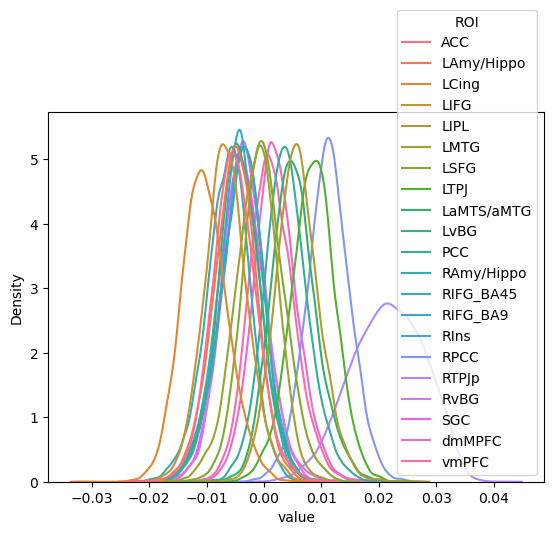

In [27]:
sns.kdeplot(x="value", hue="ROI", data=melt_frame)

In [28]:
means = melt_frame.groupby(["ROI"]).value.mean().sort_values(ascending=False)
means

ROI
RTPJp         0.021531
RPCC          0.011222
LTPJ          0.008526
LIPL          0.005835
LaMTS/aMTG    0.005263
PCC           0.003910
dmMPFC        0.002041
vmPFC         0.001366
LSFG          0.000010
LMTG         -0.001395
RvBG         -0.003513
SGC          -0.003557
RAmy/Hippo   -0.003918
RIns         -0.003951
LvBG         -0.004361
RIFG_BA9     -0.004486
LAmy/Hippo   -0.005136
ACC          -0.005155
RIFG_BA45    -0.006323
LIFG         -0.006608
LCing        -0.010335
Name: value, dtype: float64

In [29]:
melt_frame["mean"] = np.nan
for label, mean in means.items():
    melt_frame.loc[melt_frame.ROI == label, "mean"] = mean * 1000

In [30]:
melt_frame

draw  chain    ROI     value      mean
0          0      0    ACC -0.003409 -5.154540
1          0      1    ACC -0.001781 -5.154540
2          0      2    ACC  0.004964 -5.154540
3          0      3    ACC -0.005693 -5.154540
4          0      4    ACC -0.008843 -5.154540
...      ...    ...    ...       ...       ...
167995   999      3  vmPFC  0.003357  1.366122
167996   999      4  vmPFC  0.000495  1.366122
167997   999      5  vmPFC -0.000412  1.366122
167998   999      6  vmPFC  0.000277  1.366122
167999   999      7  vmPFC -0.000605  1.366122

[168000 rows x 5 columns]

NameError: name 'order' is not defined

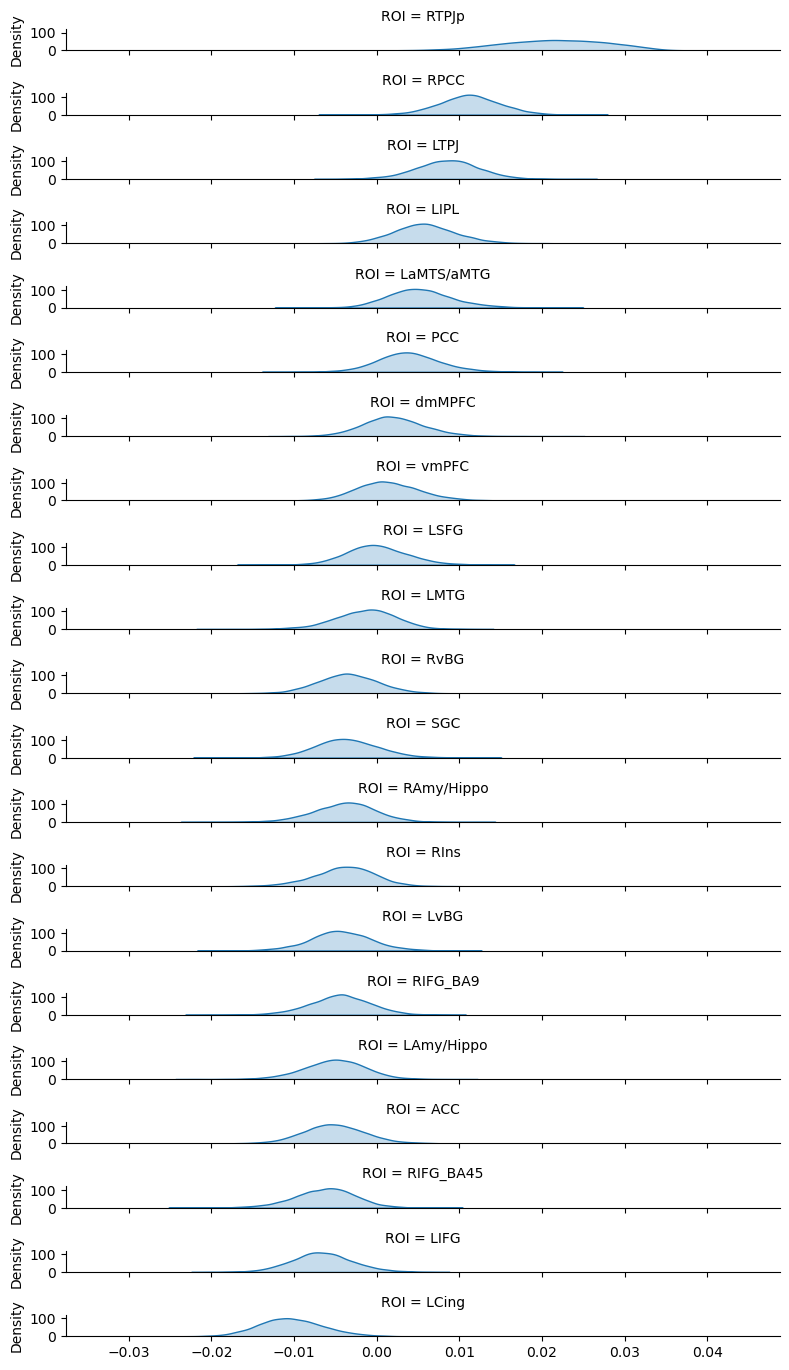

In [31]:
g = sns.FacetGrid(
    melt_frame, 
    row="ROI",
    row_order=means.index, 
    sharex=True, 
    height=2 / 3, 
    aspect=12
)

g.map_dataframe(sns.kdeplot, x="value", fill=True)

g.set_axis_labels("")

axes = g.axes.ravel()
for i, (label, ax, mean) in enumerate(zip(order, axes, means)):
    ax.set_title("")
    ax.set_title(label, loc="left")
    
    ax.spines["left"].set_visible(False)
    ax.set_ylabel("")
    ax.set_yticks([])
    
    ax.axvline(x=mean, color="black")

In [179]:
cmap.__dict__

{'monochrome': False,
 'colors': array([[0.76805788, 0.88417562, 0.89908506, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        ...,
        [0.12773581, 0.14704718, 0.25329666, 1.        ],
        [0.12773581, 0.14704718, 0.25329666, 1.        ],
        [0.12477747, 0.14301385, 0.24734758, 1.        ]]),
 'name': 'seaborn_cubehelix',
 'N': 256,
 '_rgba_bad': (0.0, 0.0, 0.0, 0.0),
 '_rgba_under': None,
 '_rgba_over': None,
 '_i_under': 256,
 '_i_over': 257,
 '_i_bad': 258,
 '_isinit': True,
 'colorbar_extend': False,
 '_lut': array([[0.76805788, 0.88417562, 0.89908506, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        [0.76253291, 0.88079348, 0.89664309, 1.        ],
        ...,
        [0.76805788, 0.88417562, 0.89908506, 1.        ],
        [0.12477747, 0.14301385, 0.24734758, 1.        ],
        [0.        , 0.        , 0.        , 0.        ]])}

[<AxesSubplot:title={'center':'ROI__factor_dim = RTPJp'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = RPCC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LTPJ'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LIPL'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LaMTS/aMTG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = PCC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = dmMPFC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = vmPFC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LSFG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = LMTG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = RvBG'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = SGC'}, ylabel='Density'>,
 <AxesSubplot:title={'center':'ROI__factor_dim = RAmy/Hippo'}, ylabel='Density'>

AttributeError: 'numpy.ndarray' object has no attribute 'spines'